# Tabular Data Model:

In [618]:
import pandas as pd

# Loading the cleaned Tabular train data
data = pd.read_csv("/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Intermediate_Results/cleaned_train.csv")
print(data.head())

         id  Basic_Demos-Age  Basic_Demos-Sex   age_group  CGAS_Score  \
0  00008ff9                5                0       Child   51.000000   
1  000fd460                9                0  Early Teen   65.156829   
2  00105258               10                1  Early Teen   65.156829   
3  00115b9f                9                0  Early Teen   71.000000   
4  001f3379               13                1        Teen   50.000000   

   Physical-BMI  BIA_Activity_Level  Fitness_Combined_Score  \
0     16.877316                 2.0                0.200000   
1     14.035590                 2.0                0.400000   
2     19.131648                 3.0                0.583126   
3     18.292347                 3.0                0.400000   
4     22.279952                 2.0                0.400000   

   Physical_Composite_Index  SDS-SDS_Total_T  \
0                  0.184805             64.4   
1                  0.178587             64.0   
2                  0.193319           

In [620]:
# Checking the shape of the dataset (rows, columns)
print(f"Dataset Shape: {data.shape}")

# Checking for missing values
print("Missing Values:\n", data.isnull().sum())

# Displaying the data types of each column
print("Data Types:\n", data.dtypes)

Dataset Shape: (2730, 12)
Missing Values:
 id                                        0
Basic_Demos-Age                           0
Basic_Demos-Sex                           0
age_group                                 0
CGAS_Score                                0
Physical-BMI                              0
BIA_Activity_Level                        0
Fitness_Combined_Score                    0
Physical_Composite_Index                  0
SDS-SDS_Total_T                           0
PreInt_EduHx-computerinternet_hoursday    0
sii                                       0
dtype: int64
Data Types:
 id                                         object
Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
age_group                                  object
CGAS_Score                                float64
Physical-BMI                              float64
BIA_Activity_Level                        float64
Fitness_Combined_Score                    float64
Phy

In [622]:
# Getting the summary statistics for the numeric columns
print(data.describe())

       Basic_Demos-Age  Basic_Demos-Sex   CGAS_Score  Physical-BMI  \
count      2730.000000      2730.000000  2730.000000   2730.000000   
mean         10.234799         0.364469    65.156829     19.131648   
std           3.423267         0.481369    10.897990      4.709919   
min           5.000000         0.000000    25.000000      0.000000   
25%           8.000000         0.000000    60.000000     15.952191   
50%          10.000000         0.000000    65.156829     18.320193   
75%          12.000000         1.000000    71.000000     20.807959   
max          22.000000         1.000000    95.000000     46.102914   

       BIA_Activity_Level  Fitness_Combined_Score  Physical_Composite_Index  \
count         2730.000000             2730.000000               2730.000000   
mean             2.668864                0.583126                  0.193319   
std              1.031326                0.242886                  0.016389   
min              1.000000                0.000000    

sii Distribution:
 sii
0.0    1589
1.0     730
2.0     377
3.0      34
Name: count, dtype: int64


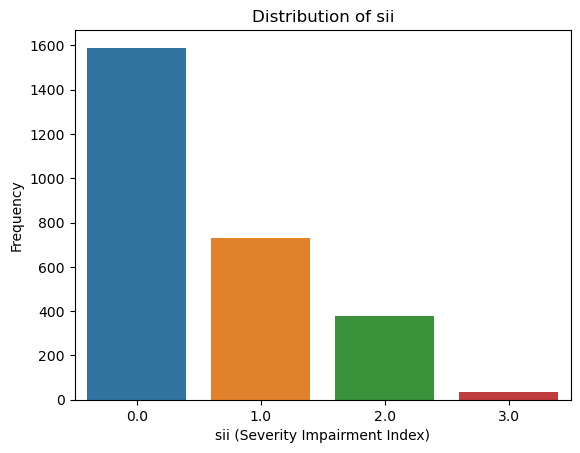

In [624]:
# Checking the distribution of 'sii'
print("sii Distribution:\n", data['sii'].value_counts())

# Visualizing the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='sii')
plt.title("Distribution of sii")
plt.xlabel("sii (Severity Impairment Index)")
plt.ylabel("Frequency")
plt.show()

We can clearly see the class imbalance in the target variable, sii. We will likely have to perform Oversampling using techniques like SMOTE (Synthetic Minority Oversampling Technique). But before doing that, we will develop a model without SMOTE and then try to see if SMOTE will help us in arriving at a better prediction. This will give us a proper indication of whether SMOTE affected the overall model performance positively or negatively.

In [627]:
import pandas as pd

# Defining the Features (X) and Target (y) for the baseline model
X_baseline_model = data.drop(columns=["id", "sii"])  
y_baseline_model = data["sii"]  

print("Feature Data Types:\n", X_baseline_model.dtypes)

Feature Data Types:
 Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
age_group                                  object
CGAS_Score                                float64
Physical-BMI                              float64
BIA_Activity_Level                        float64
Fitness_Combined_Score                    float64
Physical_Composite_Index                  float64
SDS-SDS_Total_T                           float64
PreInt_EduHx-computerinternet_hoursday    float64
dtype: object


In [629]:
from sklearn.preprocessing import OneHotEncoder

# Identifying the non-numeric columns and encoding them
non_numeric_columns = X_baseline_model.select_dtypes(include=["object"]).columns
print("Non-Numeric Columns:", non_numeric_columns)

# Applying one-hot encoding to non-numeric columns
encoder_baseline_model = OneHotEncoder(sparse=False, handle_unknown="ignore")
encoded_features_baseline_model = encoder_baseline_model.fit_transform(X_baseline_model[non_numeric_columns])

# Converting encoded features into a DataFrame
encoded_df_baseline_model = pd.DataFrame(
    encoded_features_baseline_model, columns=encoder_baseline_model.get_feature_names_out(non_numeric_columns)
)

# Dropping the original non-numeric columns from X
X_baseline_model = X_baseline_model.drop(columns=non_numeric_columns)

# Concatenating the encoded features with the rest of X
X_baseline_model = pd.concat(
    [X_baseline_model.reset_index(drop=True), encoded_df_baseline_model.reset_index(drop=True)], axis=1
)

# Verifying if all the features are now numeric
print("Updated Feature Data Types:\n", X_baseline_model.dtypes)

Non-Numeric Columns: Index(['age_group'], dtype='object')
Updated Feature Data Types:
 Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
CGAS_Score                                float64
Physical-BMI                              float64
BIA_Activity_Level                        float64
Fitness_Combined_Score                    float64
Physical_Composite_Index                  float64
SDS-SDS_Total_T                           float64
PreInt_EduHx-computerinternet_hoursday    float64
age_group_Adult                           float64
age_group_Child                           float64
age_group_Early Teen                      float64
age_group_Teen                            float64
age_group_Young Adult                     float64
dtype: object


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [631]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features for the baseline model
scaler_baseline_model = StandardScaler()
X_baseline_model_scaled = scaler_baseline_model.fit_transform(X_baseline_model)

print("Standardized Features Shape:", X_baseline_model_scaled.shape)

Standardized Features Shape: (2730, 14)


In [633]:
from sklearn.model_selection import train_test_split

# Splitting the standardized data for the baseline model
X_train_baseline_model, X_val_baseline_model, y_train_baseline_model, y_val_baseline_model = train_test_split(
    X_baseline_model_scaled, y_baseline_model, test_size=0.2, random_state=42, stratify=y_baseline_model
)

print("Training Features Shape:", X_train_baseline_model.shape)
print("Validation Features Shape:", X_val_baseline_model.shape)

Training Features Shape: (2184, 14)
Validation Features Shape: (546, 14)


In [635]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest Classifier for the baseline model
rf_model_baseline = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
rf_model_baseline.fit(X_train_baseline_model, y_train_baseline_model)

RandomForestClassifier(random_state=42)

Baseline Random Forest Model Performance:
Accuracy: 0.5861
F1-Score (Weighted): 0.5482
Precision (Macro): 0.3498
Recall (Macro): 0.3208
Cohen's Kappa: 0.1875
Matthews Correlation Coefficient: 0.1965
ROC-AUC (Weighted): 0.7022159983738093

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.84      0.74       318
         1.0       0.36      0.27      0.31       146
         2.0       0.37      0.17      0.24        75
         3.0       0.00      0.00      0.00         7

    accuracy                           0.59       546
   macro avg       0.35      0.32      0.32       546
weighted avg       0.54      0.59      0.55       546



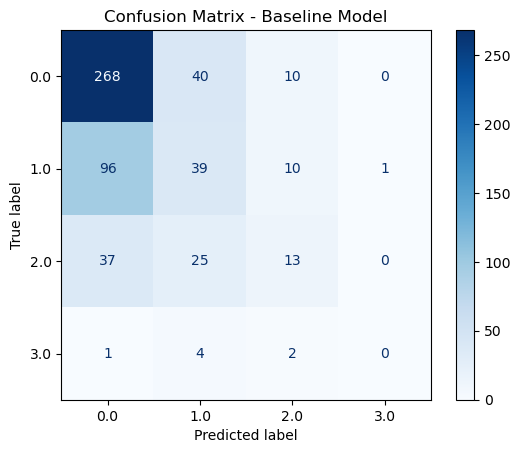

In [637]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    roc_auc_score,
    cohen_kappa_score,
    matthews_corrcoef,
    classification_report,
    ConfusionMatrixDisplay,
)

# Predictions
y_pred_baseline_model = rf_model_baseline.predict(X_val_baseline_model)

# Accuracy and F1-Score
accuracy_baseline_model = accuracy_score(y_val_baseline_model, y_pred_baseline_model)
f1_baseline_model = f1_score(y_val_baseline_model, y_pred_baseline_model, average="weighted")

# Precision and Recall (Macro-Averaged)
precision_macro = precision_score(y_val_baseline_model, y_pred_baseline_model, average="macro")
recall_macro = recall_score(y_val_baseline_model, y_pred_baseline_model, average="macro")

# Cohen's Kappa
cohen_kappa = cohen_kappa_score(y_val_baseline_model, y_pred_baseline_model)

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_val_baseline_model, y_pred_baseline_model)

# ROC-AUC 
try:
    roc_auc = roc_auc_score(y_val_baseline_model, rf_model_baseline.predict_proba(X_val_baseline_model), multi_class="ovr", average="weighted")
except AttributeError:
    roc_auc = "Not Applicable (check binary vs. multiclass setup)"

print("Baseline Random Forest Model Performance:")
print(f"Accuracy: {accuracy_baseline_model:.4f}")
print(f"F1-Score (Weighted): {f1_baseline_model:.4f}")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"ROC-AUC (Weighted): {roc_auc}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_val_baseline_model, y_pred_baseline_model))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val_baseline_model, y_pred_baseline_model, cmap="Blues")
plt.title("Confusion Matrix - Baseline Model")
plt.show()

The results of the baseline model show that the model achieved an accuracy of 58.61 and a weighted F1-score of 0.5482, indicating moderate performance. However, the model struggles significantly with imbalanced classes, as reflected in the macro-averaged precision (0.3498) and recall (0.3208). The ROC-AUC score of 0.702 suggests the model has some ability to discriminate between classes, but it heavily favors the majority class (`0.0`) with the highest recall (84%) and F1-score (0.74). Minority classes, particularly `3.0` (severe), are poorly predicted with 0% precision, recall, and F1-score, highlighting the model's inability to handle class imbalance effectively. The confusion matrix confirms that predictions are biased towards the majority class, with significant misclassifications for minority classes (`1.0`, `2.0`, `3.0`).

In [640]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Binarizing the true labels for multiclass (One-vs-Rest)
n_classes = len(rf_model_baseline.classes_)
y_true_binary = label_binarize(y_val_baseline_model, classes=range(n_classes))

# Generating predicted probabilities
y_probs_baseline_model = rf_model_baseline.predict_proba(X_val_baseline_model)

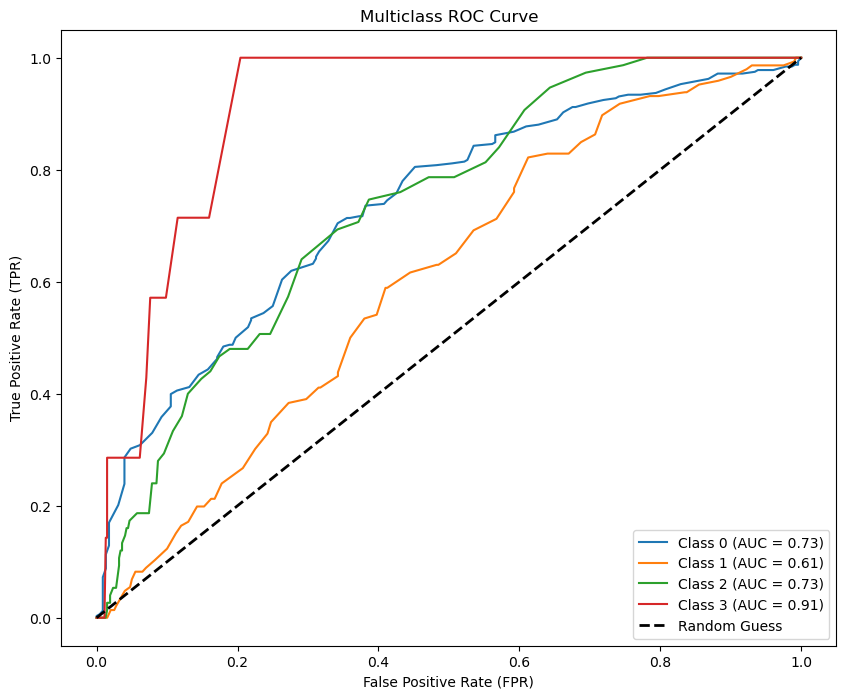

In [642]:
# Plotting ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_binary[:, i], y_probs_baseline_model[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random Guess")
plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()

The model's uneven performance across classes is revealed by the Multiclass ROC Curve which is seen above. Class 1 shows poorer discrimination between real positives and false positives, with a lower AUC of 0.61, but the majority class (Class 0) and another moderately represented class (Class 2) attain a respectable AUC of 0.73. Remarkably, Class 3 has the highest AUC of 0.91 while being the least represented. This indicates that the model can partially distinguish this class using projected probabilities, but earlier metrics like accuracy and recall do not reflect this. All classes show that the model performs better than random guessing overall (AUC = 0.50), but the large variation in AUC values highlights the need to correct for class imbalance and improve the model.

Since the results seem to be highly affected by the class imbalance, let us use ADASYN for performing oversampling and see how the model performs on that data.

In [649]:
from imblearn.over_sampling import ADASYN

# Applying ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn_model, y_train_adasyn_model = adasyn.fit_resample(X_train_baseline_model, y_train_baseline_model)

# Checking the class distribution after resampling
print("Class Distribution After ADASYN:\n", pd.Series(y_train_adasyn_model).value_counts())

Class Distribution After ADASYN:
 sii
0.0    1271
3.0    1269
1.0    1234
2.0    1201
Name: count, dtype: int64


In [651]:
# Training the Random Forest model using the ADASYN-resampled data
rf_model_adasyn = RandomForestClassifier(random_state=42, class_weight=None)
rf_model_adasyn.fit(X_train_adasyn_model, y_train_adasyn_model)

RandomForestClassifier(random_state=42)

ADASYN Random Forest Model Performance:
Accuracy: 0.5568
F1-Score (Weighted): 0.5512
Precision (Macro): 0.3320
Recall (Macro): 0.3284
Cohen's Kappa: 0.2096
Matthews Correlation Coefficient: 0.2101
ROC-AUC (Weighted): 0.7124655478707607

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       318
         1.0       0.37      0.32      0.34       146
         2.0       0.25      0.24      0.24        75
         3.0       0.00      0.00      0.00         7

    accuracy                           0.56       546
   macro avg       0.33      0.33      0.33       546
weighted avg       0.55      0.56      0.55       546



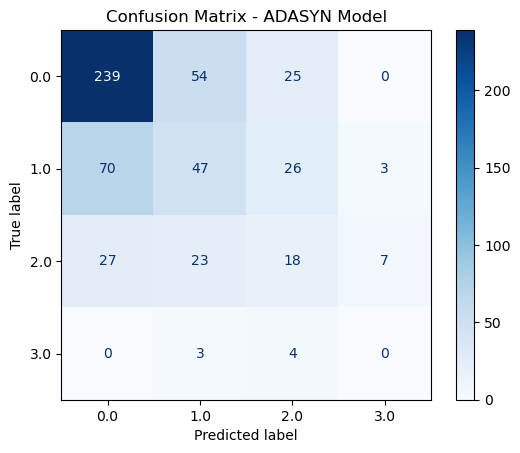

In [653]:
# Predictions
y_pred_adasyn_model = rf_model_adasyn.predict(X_val_baseline_model)

# Basic Metrics
accuracy_adasyn_model = accuracy_score(y_val_baseline_model, y_pred_adasyn_model)
f1_adasyn_model = f1_score(y_val_baseline_model, y_pred_adasyn_model, average="weighted")

# Precision and Recall
precision_macro_adasyn = precision_score(y_val_baseline_model, y_pred_adasyn_model, average="macro")

recall_macro_adasyn = recall_score(y_val_baseline_model, y_pred_adasyn_model, average="macro")

# Cohen's Kappa
cohen_kappa_adasyn = cohen_kappa_score(y_val_baseline_model, y_pred_adasyn_model)

# Matthews Correlation Coefficient
mcc_adasyn = matthews_corrcoef(y_val_baseline_model, y_pred_adasyn_model)

# ROC-AUC
try:
    y_probs_adasyn_model = rf_model_adasyn.predict_proba(X_val_baseline_model)
    roc_auc_adasyn = roc_auc_score(
        y_val_baseline_model, y_probs_adasyn_model, multi_class="ovr", average="weighted"
    )
except AttributeError:
    roc_auc_adasyn = "Not Applicable (check binary vs. multiclass setup)"

print("ADASYN Random Forest Model Performance:")
print(f"Accuracy: {accuracy_adasyn_model:.4f}")
print(f"F1-Score (Weighted): {f1_adasyn_model:.4f}")
print(f"Precision (Macro): {precision_macro_adasyn:.4f}")
print(f"Recall (Macro): {recall_macro_adasyn:.4f}")
print(f"Cohen's Kappa: {cohen_kappa_adasyn:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_adasyn:.4f}")
print(f"ROC-AUC (Weighted): {roc_auc_adasyn}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_val_baseline_model, y_pred_adasyn_model))

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_val_baseline_model, y_pred_adasyn_model, cmap="Blues"
)
plt.title("Confusion Matrix - ADASYN Model")
plt.show()

The ADASYN model's predictions for minority classes were somewhat better than the baseline, according to the confusion matrix, but it still has a lot of problems, particularly with Class 3. Classes 1 and 2 exhibit significant misclassifications, with the majority of cases falling into Class 0, whilst Class 0 attains the highest precision and recall, with 239 right predictions out of 318. Since most of Class 3's examples are incorrectly classified, there is no discernible improvement, suggesting that the model still suffers from extreme underrepresentation even with ADASYN's synthetic sampling.

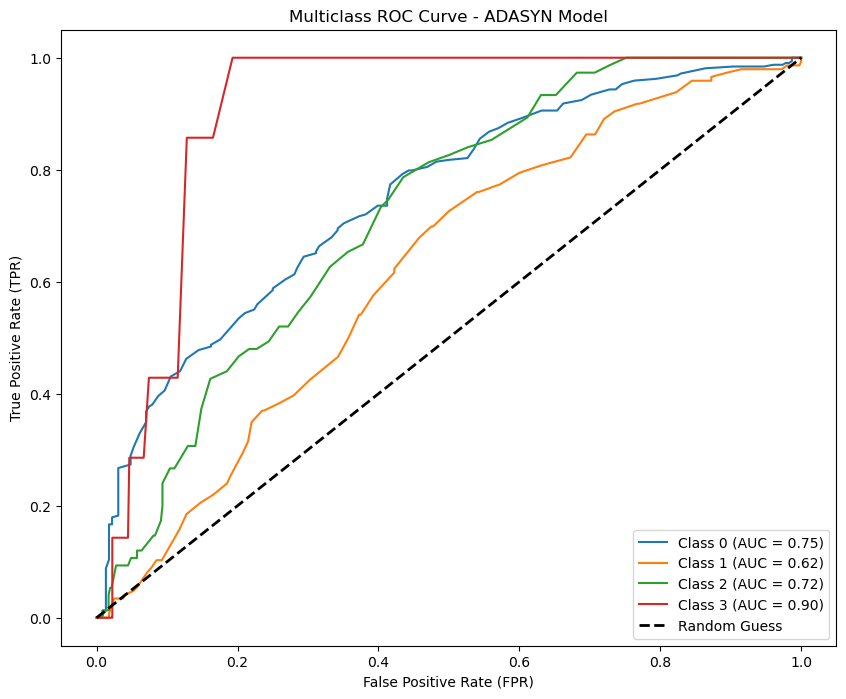

In [656]:
# Binarizing the true labels for multiclass ROC curve
from sklearn.preprocessing import label_binarize
n_classes = len(rf_model_adasyn.classes_)  # Number of classes
y_true_binary = label_binarize(y_val_baseline_model, classes=range(n_classes))

# Predicting probabilities
y_probs_adasyn_model = rf_model_adasyn.predict_proba(X_val_baseline_model)

# Plotting the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_binary[:, i], y_probs_adasyn_model[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Adding a random guess line
plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random Guess")

plt.title("Multiclass ROC Curve - ADASYN Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()

For the majority of classes, the ADASYN model's ROC curve shows a moderate improvement in discriminatory power. Class 3 obtains the greatest AUC of 0.90, indicating that, although this is not represented in hard classifications, the model can effectively differentiate Class 3 cases when utilizing projected probabilities. Class 1 performs worse at recognizing genuine positives, with an AUC of 0.62, but Classes 0 and 2 have respectable AUC values of 0.75 and 0.72, respectively. While there is room for improvement, the ADASYN model needs to be further adjusted for minority classes.

In [662]:
from sklearn.model_selection import RandomizedSearchCV

# Defining the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 500, 1000],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# Initializing the Random Forest model
rf_tuning_model = RandomForestClassifier(random_state=42)

# Performing Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=rf_tuning_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter combinations to try
    scoring="f1_weighted",  # Optimized for F1-weighted to account for class imbalance
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  
)

# Fitting the randomized search model on the ADASYN-resampled training data
random_search.fit(X_train_adasyn_model, y_train_adasyn_model)

# Printing the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Weighted F1-Score:", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best Weighted F1-Score: 0.8052308474446314


Tuned Random Forest Model Performance:
Accuracy: 0.5623
F1-Score (Weighted): 0.5546
Precision (Macro): 0.3342
Recall (Macro): 0.3321
Cohen's Kappa: 0.2167
Matthews Correlation Coefficient: 0.2174
ROC-AUC (Weighted): 0.708999886534667

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.77      0.74       318
         1.0       0.35      0.29      0.32       146
         2.0       0.27      0.27      0.27        75
         3.0       0.00      0.00      0.00         7

    accuracy                           0.56       546
   macro avg       0.33      0.33      0.33       546
weighted avg       0.55      0.56      0.55       546



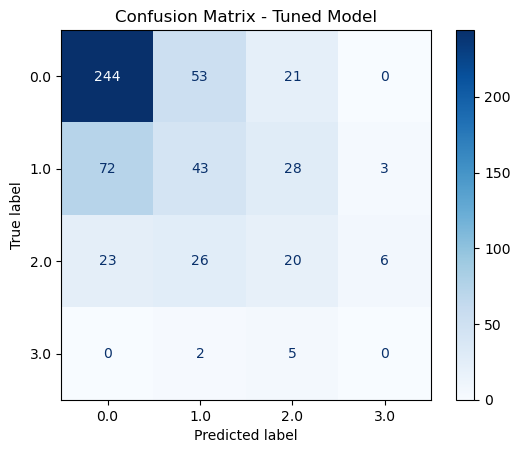

In [666]:
# Getting the best model from the RandomizedSearchCV
best_rf_tuning_model = random_search.best_estimator_

# Predictions
y_pred_tuning_model = best_rf_tuning_model.predict(X_val_baseline_model)
y_probs_tuning_model = best_rf_tuning_model.predict_proba(X_val_baseline_model)

# Basic Metrics
accuracy_tuning_model = accuracy_score(y_val_baseline_model, y_pred_tuning_model)
f1_tuning_model = f1_score(y_val_baseline_model, y_pred_tuning_model, average="weighted")

# Precision and Recall 
precision_macro_tuning = precision_score(y_val_baseline_model, y_pred_tuning_model, average="macro")
recall_macro_tuning = recall_score(y_val_baseline_model, y_pred_tuning_model, average="macro")

# Cohen's Kappa
cohen_kappa_tuning = cohen_kappa_score(y_val_baseline_model, y_pred_tuning_model)

# Matthews Correlation Coefficient
mcc_tuning = matthews_corrcoef(y_val_baseline_model, y_pred_tuning_model)

# ROC-AUC 
try:
    roc_auc_tuning = roc_auc_score(
        y_val_baseline_model, y_probs_tuning_model, multi_class="ovr", average="weighted"
    )
except AttributeError:
    roc_auc_tuning = "Not Applicable"

print("Tuned Random Forest Model Performance:")
print(f"Accuracy: {accuracy_tuning_model:.4f}")
print(f"F1-Score (Weighted): {f1_tuning_model:.4f}")
print(f"Precision (Macro): {precision_macro_tuning:.4f}")
print(f"Recall (Macro): {recall_macro_tuning:.4f}")
print(f"Cohen's Kappa: {cohen_kappa_tuning:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_tuning:.4f}")
print(f"ROC-AUC (Weighted): {roc_auc_tuning}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_val_baseline_model, y_pred_tuning_model))

# Displaying the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_val_baseline_model, y_pred_tuning_model, cmap="Blues"
)
plt.title("Confusion Matrix - Tuned Model")
plt.show()

The confusion matrix for the tuned Random Forest model shows slight improvements in correctly classifying minority classes but still reflects challenges with Class 3. Class 0 continues to dominate with the highest true positive rate, achieving 244 correct predictions out of 318 instances. Class 1 sees some improvement in correct classifications, with 43 instances correctly identified, but there is still significant overlap where instances are misclassified as Class 0. Similarly, for Class 2, 26 instances are correctly classified, but the majority are confused with Class 0 or Class 1. For Class 3, while there are now five instances correctly classified, performance remains poor due to the extreme imbalance.

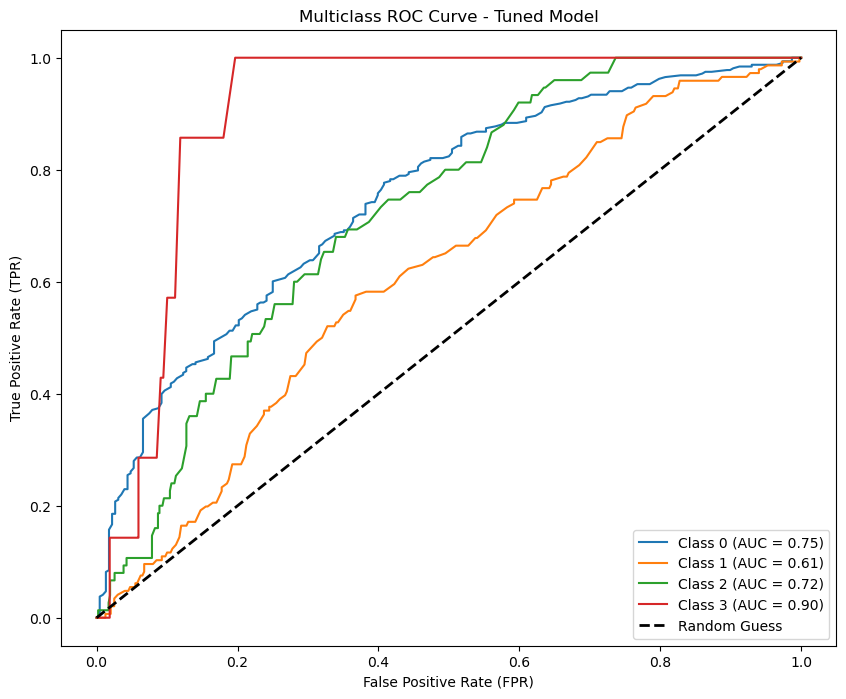

In [669]:
# Binarizing the true labels
n_classes = len(best_rf_tuning_model.classes_)
y_true_binary_tuning = label_binarize(y_val_baseline_model, classes=range(n_classes))

# Plotting the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_binary_tuning[:, i], y_probs_tuning_model[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Adding a random guess line
plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random Guess")

plt.title("Multiclass ROC Curve - Tuned Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()

Marginal gains in discrimination ability across all classes are shown by the ROC Curve. Class 1 continues to be the worst performer with an AUC of 0.61, while Class 0 continues to perform well with an AUC of 0.75. In comparison to previous models, Class 2 has demonstrated a little increase, achieving an AUC of 0.72, indicating improved separation of real positives from false positives. Despite having poor precision and recall in actual classification, Class 3 nevertheless has the greatest AUC of 0.90, indicating the model's capacity to discriminate this class probabilistically. The tweaked model is more effective at differentiating between classes overall, according to the ROC Curve, but it still has trouble balancing performance across all classes, especially the underrepresented ones.

In [679]:
from joblib import dump

# Saving the best model for the Tabular Data
model_path = "/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models/tabular_adasyn_tuned_rf_tuning_model.joblib"
dump(best_rf_tuning_model, model_path)
print(f"Best RF Tuning Model saved successfully at: {model_path}")

Best RF Tuning Model saved successfully at: /Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models/tabular_adasyn_tuned_rf_tuning_model.joblib


In [681]:
from joblib import load

# Reloading the saved model
rf_tuning_model = load("/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models/tabular_adasyn_tuned_rf_tuning_model.joblib")
print("Model loaded successfully!")

# Verifying if the model is fitted by checking its classes_
print("Classes:", rf_tuning_model.classes_)

Model loaded successfully!
Classes: [0. 1. 2. 3.]


# Actigraphy Data Model:

In [683]:
import pandas as pd

# Path to the consolidated Actigraphy train file
EXTRACTED_FEATURES_PATH = "/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Intermediate_Results/Actigraphy_extracted_features_final.csv"

# Loading the data
features = pd.read_csv(EXTRACTED_FEATURES_PATH)
print("Feature Data Shape:", features.shape)
print(features.head())

Feature Data Shape: (996, 17)
     mean_x    mean_y    mean_z     std_x     std_y     std_z  mean_enmo  \
0  0.021842  0.022246 -1.019922  0.000338  0.000240  0.001765   0.020411   
1  0.017524  0.012113 -0.433691  0.446348  0.338916  0.700912   0.013445   
2  0.217549  0.064164  0.159889  0.507957  0.464649  0.644808   0.029802   
3 -0.371353 -0.045925 -0.317117  0.504219  0.433393  0.512965   0.035465   
4  0.023208  0.068822 -0.051804  0.599330  0.513489  0.567990   0.061621   

   std_enmo  max_enmo  min_enmo  mean_magnitude  std_magnitude  \
0  0.001761  0.022853  0.018667        1.020398       0.001759   
1  0.031016  2.952888  0.000000        0.996000       0.049507   
2  0.104216  3.681586  0.000000        0.980751       0.070811   
3  0.085573  2.506849  0.000000        0.969044       0.082127   
4  0.202441  6.307294  0.000000        0.966942       0.135903   

   inactivity_percentage  non_wear_percentage participant_id activity_level  \
0               0.000000             

In [685]:
# Checking for missing values
missing_values = features.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Displaying the rows with missing values
rows_with_missing = features[features.isnull().any(axis=1)]
print("Rows with Missing Values:")
print(rows_with_missing)

Missing Values in Each Column:
mean_x                   0
mean_y                   0
mean_z                   0
std_x                    2
std_y                    2
std_z                    2
mean_enmo                0
std_enmo                 2
max_enmo                 0
min_enmo                 0
mean_magnitude           0
std_magnitude            2
inactivity_percentage    0
non_wear_percentage      0
participant_id           0
activity_level           0
sii                      0
dtype: int64
Rows with Missing Values:
       mean_x    mean_y    mean_z  std_x  std_y  std_z  mean_enmo  std_enmo  \
672 -0.737998 -0.466262  0.404230    NaN    NaN    NaN   0.000000       NaN   
842  0.645021  0.667420 -0.203122    NaN    NaN    NaN   0.013003       NaN   

     max_enmo  min_enmo  mean_magnitude  std_magnitude  inactivity_percentage  \
672  0.000000  0.000000        0.962000            NaN                  100.0   
842  0.013003  0.013003        0.950137            NaN                 

Significant anomalies were found throughout the cleaning procedure for the participants ab16a20d and db38d1f9, leading to inconsistent and incomplete data. The majority of the data from both individuals was eliminated since they were unable to achieve the statistical standards for regular 5-second intervals. There was almost no useful activity or motion data in the remaining rows for these participants, which displayed missing values in important aspects including variability metrics (std_x, std_y, and std_enmo). Because the missing values make effective modeling impossible, keeping these rows would add bias and noise to the dataset. We have chosen to remove these rows in order to proceed with a clean and consistent dataset for model training, ensuring the dependability and quality of the actigraphy dataset.

In [688]:
# Dropping rows with missing values
features_cleaned = features.dropna()

# Verifying the shape of the cleaned dataset
print("Shape of Cleaned Dataset:", features_cleaned.shape)

Shape of Cleaned Dataset: (994, 17)


In [690]:
# Separating the features and the target
X_actigraphy = features_cleaned.drop(columns=["participant_id", "sii"])
y_actigraphy = features_cleaned["sii"]

# Checking for non-numeric columns
non_numeric_columns = X_actigraphy.select_dtypes(include=["object"]).columns
print("Non-Numeric Columns:", non_numeric_columns)

Non-Numeric Columns: Index(['activity_level'], dtype='object')


In [692]:
# Initializing the OneHotEncoder
encoder_baseline_model = OneHotEncoder(sparse=False, handle_unknown="ignore")

# Applying encoding to non-numeric columns
encoded_features_baseline_model = encoder_baseline_model.fit_transform(X_actigraphy[non_numeric_columns])

# Converting encoded features into a DataFrame
encoded_df_baseline_model = pd.DataFrame(
    encoded_features_baseline_model, columns=encoder_baseline_model.get_feature_names_out(non_numeric_columns)
)

# Dropping original non-numeric columns from X_actigraphy
X_actigraphy = X_actigraphy.drop(columns=non_numeric_columns)

# Concatenating the encoded features with the numeric features
X_actigraphy = pd.concat(
    [X_actigraphy.reset_index(drop=True), encoded_df_baseline_model.reset_index(drop=True)], axis=1
)

# Verifying if all features are numeric
print("Updated Feature Data Types:\n", X_actigraphy.dtypes)

Updated Feature Data Types:
 mean_x                   float64
mean_y                   float64
mean_z                   float64
std_x                    float64
std_y                    float64
std_z                    float64
mean_enmo                float64
std_enmo                 float64
max_enmo                 float64
min_enmo                 float64
mean_magnitude           float64
std_magnitude            float64
inactivity_percentage    float64
non_wear_percentage      float64
activity_level_Low       float64
activity_level_Medium    float64
dtype: object


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [694]:
# Train-test split
X_train_actigraphy, X_val_actigraphy, y_train_actigraphy, y_val_actigraphy = train_test_split(
    X_actigraphy, y_actigraphy, test_size=0.2, random_state=42, stratify=y_actigraphy
)

# Verifying the split shapes
print("Training Features Shape:", X_train_actigraphy.shape)
print("Validation Features Shape:", X_val_actigraphy.shape)

Training Features Shape: (795, 16)
Validation Features Shape: (199, 16)


In [696]:
# Standardizing the features
scaler_baseline_model = StandardScaler()
X_train_actigraphy_scaled = scaler_baseline_model.fit_transform(X_train_actigraphy)
X_val_actigraphy_scaled = scaler_baseline_model.transform(X_val_actigraphy)

In [698]:
# Applying PCA
pca_baseline_model = PCA(n_components=10, random_state=42)  # Adjust as needed
X_train_actigraphy_pca = pca_baseline_model.fit_transform(X_train_actigraphy_scaled)
X_val_actigraphy_pca = pca_baseline_model.transform(X_val_actigraphy_scaled)

In [700]:
# Initializing the Random Forest model
rf_baseline_actigraphy_model = RandomForestClassifier(
    n_estimators=100, random_state=42, class_weight="balanced"
)

# Training the model
rf_baseline_actigraphy_model.fit(X_train_actigraphy_pca, y_train_actigraphy)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [702]:
# Making predictions
y_pred_baseline_actigraphy_pca = rf_baseline_actigraphy_model.predict(X_val_actigraphy_pca)
y_probs_baseline_actigraphy_pca = rf_baseline_actigraphy_model.predict_proba(X_val_actigraphy_pca)

Baseline Random Forest Model with PCA Performance:
Accuracy: 0.5729
F1-Score (Weighted): 0.4975
Precision (Macro): 0.2938
Recall (Macro): 0.2739
Cohen's Kappa: 0.0791
Matthews Correlation Coefficient: 0.0953
ROC-AUC (Weighted): 0.5540

Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.89      0.73       117
         1.0       0.36      0.17      0.23        53
         2.0       0.20      0.04      0.06        27
         3.0       0.00      0.00      0.00         2

    accuracy                           0.57       199
   macro avg       0.29      0.27      0.26       199
weighted avg       0.48      0.57      0.50       199



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_clas

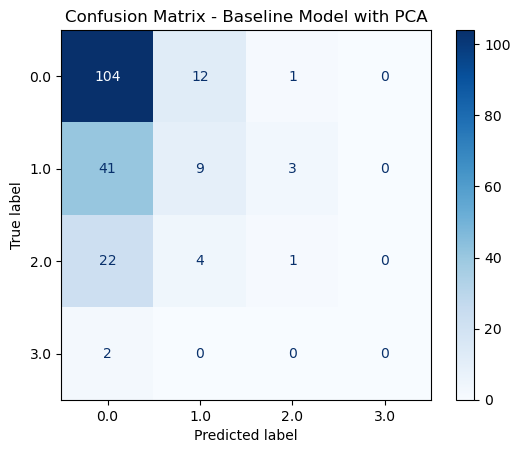

In [704]:
# Computing metrics
accuracy_baseline_actigraphy_pca = accuracy_score(y_val_actigraphy, y_pred_baseline_actigraphy_pca)
f1_baseline_actigraphy_pca = f1_score(y_val_actigraphy, y_pred_baseline_actigraphy_pca, average="weighted")
precision_baseline_actigraphy_pca = precision_score(y_val_actigraphy, y_pred_baseline_actigraphy_pca, average="macro")
recall_baseline_actigraphy_pca = recall_score(y_val_actigraphy, y_pred_baseline_actigraphy_pca, average="macro")
cohen_kappa_baseline_actigraphy_pca = cohen_kappa_score(y_val_actigraphy, y_pred_baseline_actigraphy_pca)
mcc_baseline_actigraphy_pca = matthews_corrcoef(y_val_actigraphy, y_pred_baseline_actigraphy_pca)

roc_auc_baseline_actigraphy_pca = roc_auc_score(
    y_val_actigraphy, y_probs_baseline_actigraphy_pca, multi_class="ovr", average="weighted"
)

print("Baseline Random Forest Model with PCA Performance:")
print(f"Accuracy: {accuracy_baseline_actigraphy_pca:.4f}")
print(f"F1-Score (Weighted): {f1_baseline_actigraphy_pca:.4f}")
print(f"Precision (Macro): {precision_baseline_actigraphy_pca:.4f}")
print(f"Recall (Macro): {recall_baseline_actigraphy_pca:.4f}")
print(f"Cohen's Kappa: {cohen_kappa_baseline_actigraphy_pca:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_baseline_actigraphy_pca:.4f}")
print(f"ROC-AUC (Weighted): {roc_auc_baseline_actigraphy_pca:.4f}")

# Printing the classification report
print("\nClassification Report:\n", classification_report(y_val_actigraphy, y_pred_baseline_actigraphy_pca))

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_val_actigraphy, y_pred_baseline_actigraphy_pca, cmap="Blues"
)
plt.title("Confusion Matrix - Baseline Model with PCA")
plt.show()

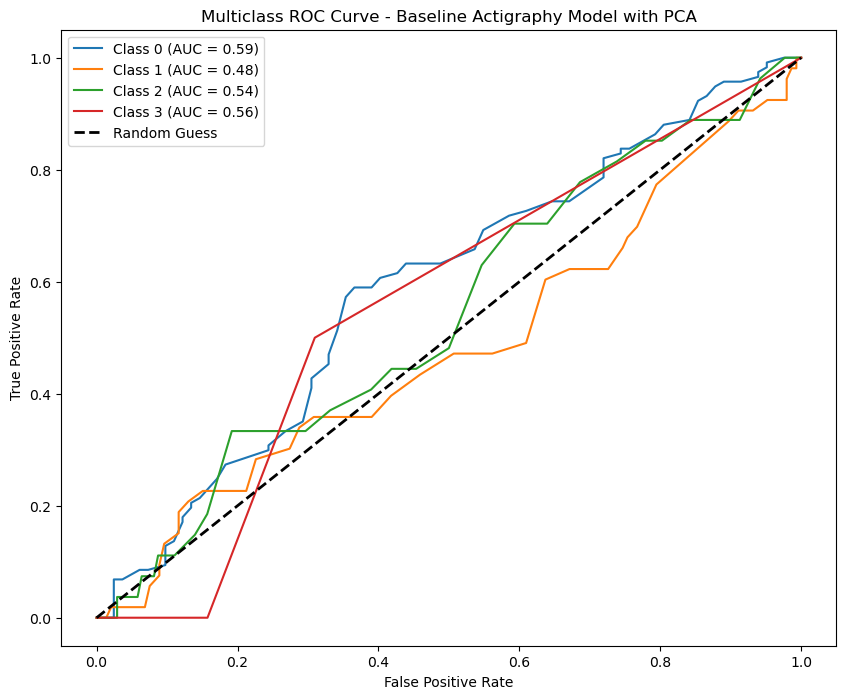

In [706]:
# Binarizing the true labels for multiclass ROC
n_classes = len(rf_baseline_actigraphy_model.classes_)
y_true_binary_baseline_actigraphy_pca = label_binarize(y_val_actigraphy, classes=range(n_classes))

# Plotting the ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_binary_baseline_actigraphy_pca[:, i], y_probs_baseline_actigraphy_pca[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Adding a Random guess line
plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random Guess")
plt.title("Multiclass ROC Curve - Baseline Actigraphy Model with PCA")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [710]:
# Applying ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn_actigraphy, y_train_adasyn_actigraphy = adasyn.fit_resample(X_train_actigraphy, y_train_actigraphy)

# Verifying the resampled dataset shape
print("Resampled Training Features Shape:", X_train_adasyn_actigraphy.shape)
print("Resampled Training Target Distribution:\n", y_train_adasyn_actigraphy.value_counts())

Resampled Training Features Shape: (1864, 16)
Resampled Training Target Distribution:
 sii
2.0    475
0.0    465
3.0    464
1.0    460
Name: count, dtype: int64


In [712]:
# Standardizing the features
scaler_adasyn_model = StandardScaler()
X_train_adasyn_actigraphy_scaled = scaler_adasyn_model.fit_transform(X_train_adasyn_actigraphy)
X_val_actigraphy_scaled = scaler_adasyn_model.transform(X_val_actigraphy)

In [714]:
# Applying PCA
pca_adasyn_model = PCA(n_components=10, random_state=42)
X_train_adasyn_actigraphy_pca = pca_adasyn_model.fit_transform(X_train_adasyn_actigraphy_scaled)
X_val_actigraphy_pca = pca_adasyn_model.transform(X_val_actigraphy_scaled)

In [716]:
# Initializing the Random Forest model
rf_adasyn_actigraphy_model = RandomForestClassifier(
    n_estimators=100, random_state=42, class_weight='balanced'
)

# Training the model
rf_adasyn_actigraphy_model.fit(X_train_adasyn_actigraphy_pca, y_train_adasyn_actigraphy)

RandomForestClassifier(class_weight='balanced', random_state=42)

ADASYN Random Forest Model with PCA Performance:
Accuracy: 0.4271
F1-Score (Weighted): 0.4315
Precision (Macro): 0.2514
Recall (Macro): 0.2573
Cohen's Kappa: 0.0104
Matthews Correlation Coefficient: 0.0104
ROC-AUC (Weighted): 0.5337

Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.58      0.59       117
         1.0       0.20      0.19      0.20        53
         2.0       0.19      0.26      0.22        27
         3.0       0.00      0.00      0.00         2

    accuracy                           0.43       199
   macro avg       0.25      0.26      0.25       199
weighted avg       0.44      0.43      0.43       199



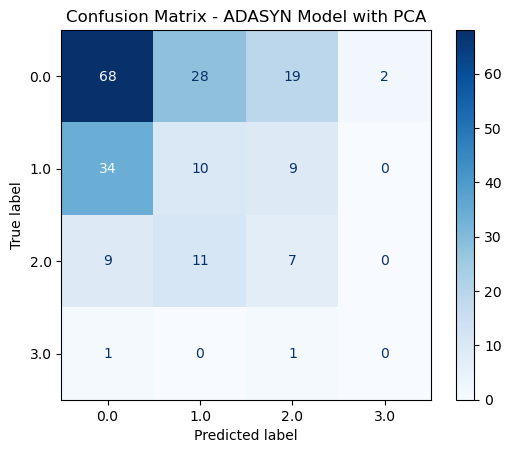

In [718]:
# Making predictions
y_pred_adasyn_actigraphy_pca = rf_adasyn_actigraphy_model.predict(X_val_actigraphy_pca)
y_probs_adasyn_actigraphy_pca = rf_adasyn_actigraphy_model.predict_proba(X_val_actigraphy_pca)

# Computing metrics
accuracy_adasyn_actigraphy_pca = accuracy_score(y_val_actigraphy, y_pred_adasyn_actigraphy_pca)
f1_adasyn_actigraphy_pca = f1_score(y_val_actigraphy, y_pred_adasyn_actigraphy_pca, average="weighted")
precision_adasyn_actigraphy_pca = precision_score(y_val_actigraphy, y_pred_adasyn_actigraphy_pca, average="macro")
recall_adasyn_actigraphy_pca = recall_score(y_val_actigraphy, y_pred_adasyn_actigraphy_pca, average="macro")
cohen_kappa_adasyn_actigraphy_pca = cohen_kappa_score(y_val_actigraphy, y_pred_adasyn_actigraphy_pca)
mcc_adasyn_actigraphy_pca = matthews_corrcoef(y_val_actigraphy, y_pred_adasyn_actigraphy_pca)
roc_auc_adasyn_actigraphy_pca = roc_auc_score(
    y_val_actigraphy, y_probs_adasyn_actigraphy_pca, multi_class="ovr", average="weighted"
)

print("ADASYN Random Forest Model with PCA Performance:")
print(f"Accuracy: {accuracy_adasyn_actigraphy_pca:.4f}")
print(f"F1-Score (Weighted): {f1_adasyn_actigraphy_pca:.4f}")
print(f"Precision (Macro): {precision_adasyn_actigraphy_pca:.4f}")
print(f"Recall (Macro): {recall_adasyn_actigraphy_pca:.4f}")
print(f"Cohen's Kappa: {cohen_kappa_adasyn_actigraphy_pca:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_adasyn_actigraphy_pca:.4f}")
print(f"ROC-AUC (Weighted): {roc_auc_adasyn_actigraphy_pca:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_val_actigraphy, y_pred_adasyn_actigraphy_pca))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_val_actigraphy, y_pred_adasyn_actigraphy_pca, cmap="Blues"
)
plt.title("Confusion Matrix - ADASYN Model with PCA")
plt.show()

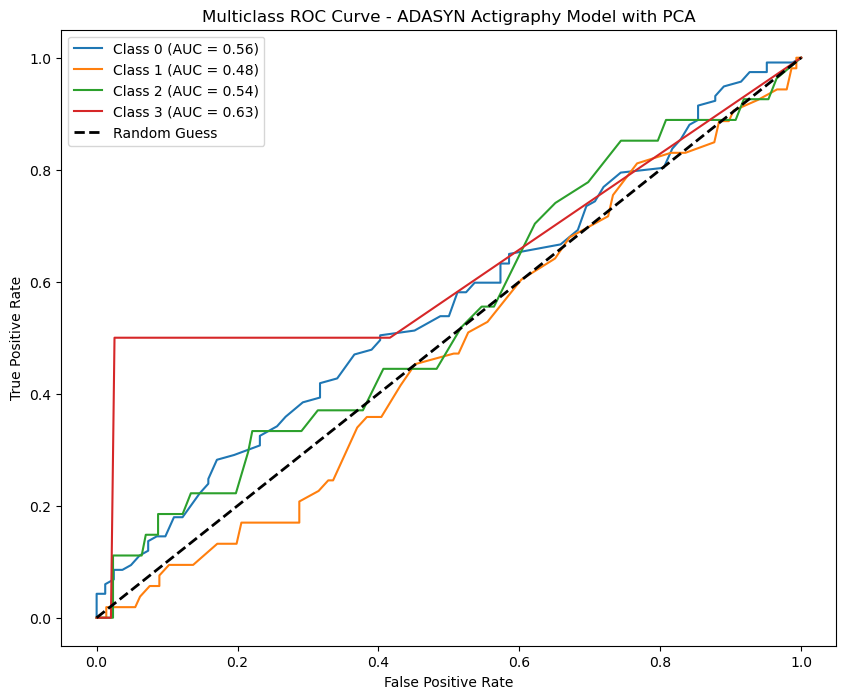

In [720]:
# Plotting the ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_binary_baseline_actigraphy_pca[:, i], y_probs_adasyn_actigraphy_pca[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random Guess")
plt.title("Multiclass ROC Curve - ADASYN Actigraphy Model with PCA")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [724]:
from sklearn.model_selection import RandomizedSearchCV

# Defining the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

In [726]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the resampled training data
scaler_tuning = StandardScaler()
X_train_adasyn_actigraphy_scaled = scaler_tuning.fit_transform(X_train_adasyn_actigraphy)
X_val_actigraphy_scaled = scaler_tuning.transform(X_val_actigraphy)

# Applying PCA
pca_tuning = PCA(n_components=10, random_state=42)
X_train_adasyn_actigraphy_pca = pca_tuning.fit_transform(X_train_adasyn_actigraphy_scaled)
X_val_actigraphy_pca = pca_tuning.transform(X_val_actigraphy_scaled)

In [728]:
# Initializing the Random Forest model
rf_tuning_actigraphy_model = RandomForestClassifier(random_state=42)

# Initializing RandomizedSearchCV
random_search_actigraphy = RandomizedSearchCV(
    estimator=rf_tuning_actigraphy_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random samples
    cv=3,  # 3-fold cross-validation
    scoring="f1_weighted",  # Optimized for weighted F1-score
    random_state=42,
    n_jobs=-1 
)

In [730]:
# Fitting RandomizedSearchCV
random_search_actigraphy.fit(X_train_adasyn_actigraphy_pca, y_train_adasyn_actigraphy)

# Retrieving the best parameters
print("Best Parameters from RandomizedSearchCV:", random_search_actigraphy.best_params_)

Best Parameters from RandomizedSearchCV: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


In [734]:
# Retrieving the best model
best_rf_tuning_actigraphy_model = random_search_actigraphy.best_estimator_

# Training the best model
best_rf_tuning_actigraphy_model.fit(X_train_adasyn_actigraphy_pca, y_train_adasyn_actigraphy)

RandomForestClassifier(bootstrap=False, n_estimators=300, random_state=42)

Tuned Random Forest Model with PCA Performance:
Accuracy: 0.4271
F1-Score (Weighted): 0.4261
Precision (Macro): 0.2394
Recall (Macro): 0.2430
Cohen's Kappa: -0.0123
Matthews Correlation Coefficient: -0.0123
ROC-AUC (Weighted): 0.5215

Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.60      0.60       117
         1.0       0.21      0.19      0.20        53
         2.0       0.15      0.19      0.17        27
         3.0       0.00      0.00      0.00         2

    accuracy                           0.43       199
   macro avg       0.24      0.24      0.24       199
weighted avg       0.43      0.43      0.43       199



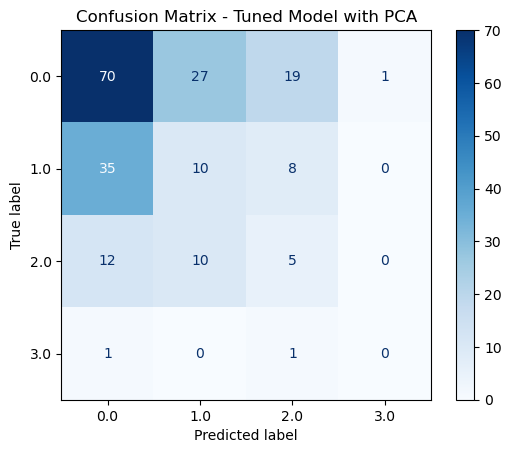

In [735]:
# Making predictions
y_pred_tuning_actigraphy_pca = best_rf_tuning_actigraphy_model.predict(X_val_actigraphy_pca)
y_probs_tuning_actigraphy_pca = best_rf_tuning_actigraphy_model.predict_proba(X_val_actigraphy_pca)

# Computing metrics
accuracy_tuning_actigraphy_pca = accuracy_score(y_val_actigraphy, y_pred_tuning_actigraphy_pca)
f1_tuning_actigraphy_pca = f1_score(y_val_actigraphy, y_pred_tuning_actigraphy_pca, average="weighted")
precision_tuning_actigraphy_pca = precision_score(y_val_actigraphy, y_pred_tuning_actigraphy_pca, average="macro")
recall_tuning_actigraphy_pca = recall_score(y_val_actigraphy, y_pred_tuning_actigraphy_pca, average="macro")
cohen_kappa_tuning_actigraphy_pca = cohen_kappa_score(y_val_actigraphy, y_pred_tuning_actigraphy_pca)
mcc_tuning_actigraphy_pca = matthews_corrcoef(y_val_actigraphy, y_pred_tuning_actigraphy_pca)
roc_auc_tuning_actigraphy_pca = roc_auc_score(
    y_val_actigraphy, y_probs_tuning_actigraphy_pca, multi_class="ovr", average="weighted"
)

print("Tuned Random Forest Model with PCA Performance:")
print(f"Accuracy: {accuracy_tuning_actigraphy_pca:.4f}")
print(f"F1-Score (Weighted): {f1_tuning_actigraphy_pca:.4f}")
print(f"Precision (Macro): {precision_tuning_actigraphy_pca:.4f}")
print(f"Recall (Macro): {recall_tuning_actigraphy_pca:.4f}")
print(f"Cohen's Kappa: {cohen_kappa_tuning_actigraphy_pca:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_tuning_actigraphy_pca:.4f}")
print(f"ROC-AUC (Weighted): {roc_auc_tuning_actigraphy_pca:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_val_actigraphy, y_pred_tuning_actigraphy_pca))

# Displaying the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_val_actigraphy, y_pred_tuning_actigraphy_pca, cmap="Blues"
)
plt.title("Confusion Matrix - Tuned Model with PCA")
plt.show()

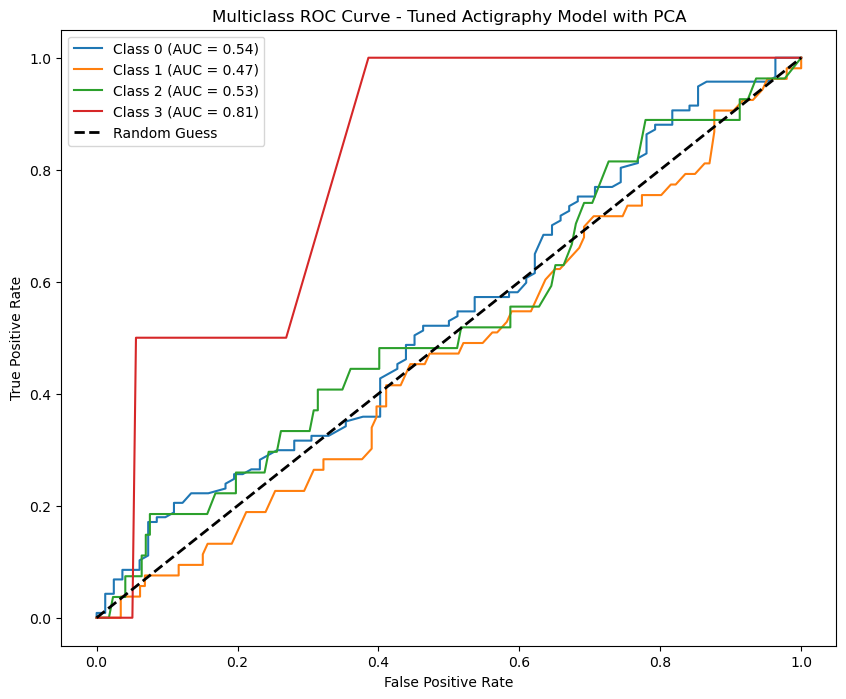

In [736]:
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_binary_baseline_actigraphy_pca[:, i], y_probs_tuning_actigraphy_pca[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random Guess")
plt.title("Multiclass ROC Curve - Tuned Actigraphy Model with PCA")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [756]:
from joblib import dump
import os

# Paths to save the scaler, PCA, and model
save_dir = "/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models"
os.makedirs(save_dir, exist_ok=True)

scaler_path = os.path.join(save_dir, "scaler_actigraphy.joblib")
pca_path = os.path.join(save_dir, "pca_actigraphy.joblib")
model_path = os.path.join(save_dir, "actigraphy_adasyn_tuned_rf_tuning_model.joblib")

# Saving the scaler and PCA
dump(scaler_tuning, scaler_path)
dump(pca_tuning, pca_path)
print(f"Scaler saved at: {scaler_path}")
print(f"PCA saved at: {pca_path}")

# Saving the trained model
dump(best_rf_tuning_actigraphy_model, model_path)
print(f"Model saved at: {model_path}")

Scaler saved at: /Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models/scaler_actigraphy.joblib
PCA saved at: /Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models/pca_actigraphy.joblib
Model saved at: /Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models/actigraphy_adasyn_tuned_rf_tuning_model.joblib


# Ensemble Method Implementation:

In [959]:
from joblib import load

# Paths to the saved models and preprocessing objects
tabular_model_path = "/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models/tabular_adasyn_tuned_rf_tuning_model.joblib"
actigraphy_model_path = "/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models/actigraphy_adasyn_tuned_rf_tuning_model.joblib"
scaler_actigraphy_path = "/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models/scaler_actigraphy.joblib"
pca_actigraphy_path = "/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models/pca_actigraphy.joblib"

# Loading the saved models and preprocessing objects
rf_tabular_model = load(tabular_model_path)
rf_actigraphy_model = load(actigraphy_model_path)
scaler_actigraphy = load(scaler_actigraphy_path)
pca_actigraphy = load(pca_actigraphy_path)

# Printing class labels for each model
print("Tabular Model Classes:", rf_tabular_model.classes_)
print("Actigraphy Model Classes:", rf_actigraphy_model.classes_)

print("Models and preprocessing objects loaded successfully!")

Tabular Model Classes: [0. 1. 2. 3.]
Actigraphy Model Classes: [0. 1. 2. 3.]
Models and preprocessing objects loaded successfully!


In [961]:
# Finding common participant IDs
common_ids = set(train_data["id"]).intersection(features_cleaned["participant_id"])

# Printing the number of common participants
print(f"Number of common participants: {len(common_ids)}")

Number of common participants: 994


In [963]:
print("Indices in Tabular data:", filtered_tabular.index)
print("Indices in Actigraphy data:", filtered_actigraphy.index)

Indices in Tabular data: Index([   3,    4,   11,   13,   15,   16,   26,   29,   30,   36,
       ...
       2708, 2709, 2711, 2712, 2715, 2718, 2720, 2723, 2728, 2729],
      dtype='int64', length=994)
Indices in Actigraphy data: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       986, 987, 988, 989, 990, 991, 992, 993, 994, 995],
      dtype='int64', length=994)


In [965]:
# Aligning the Tabular Data
aligned_tabular = filtered_tabular[filtered_tabular["id"].isin(common_ids)].set_index("id")

# Aligning the Actigraphy Data
aligned_actigraphy = filtered_actigraphy[filtered_actigraphy["participant_id"].isin(common_ids)].set_index("participant_id")

# Verifying alignment
assert aligned_tabular.index.equals(aligned_actigraphy.index), "Participant IDs are still mismatched!"

# Extracting features and labels
X_val_tabular = aligned_tabular.drop(columns=["sii"]).values
y_val_tabular = aligned_tabular["sii"].values

X_val_actigraphy = aligned_actigraphy.drop(columns=["sii"]).values
y_val_actigraphy = aligned_actigraphy["sii"].values

print("Final alignment successful:")
print(f"Number of participants: {len(aligned_tabular)}")

Final alignment successful:
Number of participants: 994


In [967]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder_actigraphy = OneHotEncoder(sparse=False, handle_unknown="ignore")
encoded_features_actigraphy = encoder_actigraphy.fit_transform(features_cleaned[["activity_level"]])

encoded_df_actigraphy = pd.DataFrame(
    encoded_features_actigraphy, 
    columns=encoder_actigraphy.get_feature_names_out(["activity_level"])
)

aligned_actigraphy = aligned_actigraphy.drop(columns=["activity_level"], errors="ignore")
aligned_actigraphy = pd.concat(
    [aligned_actigraphy.reset_index(drop=True), encoded_df_actigraphy.reset_index(drop=True)], axis=1
)

print("Updated Columns in aligned_actigraphy:", aligned_actigraphy.columns)

Updated Columns in aligned_actigraphy: Index(['mean_x', 'mean_y', 'mean_z', 'std_x', 'std_y', 'std_z', 'mean_enmo',
       'std_enmo', 'max_enmo', 'min_enmo', 'mean_magnitude', 'std_magnitude',
       'inactivity_percentage', 'non_wear_percentage', 'sii',
       'activity_level_Low', 'activity_level_Medium'],
      dtype='object')


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [969]:
# Dropping the target column ('sii') to prepare the features
X_val_actigraphy = aligned_actigraphy.drop(columns=["sii"]).values

# Standardizing the features using the saved scaler
X_val_actigraphy_scaled = scaler_actigraphy.transform(X_val_actigraphy)

# Applingy PCA using the saved PCA object
X_val_actigraphy_pca = pca_actigraphy.transform(X_val_actigraphy_scaled)

print("Actigraphy validation data prepared successfully!")
print(f"Shape after scaling: {X_val_actigraphy_scaled.shape}")
print(f"Shape after PCA: {X_val_actigraphy_pca.shape}")

Actigraphy validation data prepared successfully!
Shape after scaling: (994, 16)
Shape after PCA: (994, 10)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [993]:
print("Columns in train_data:")
print(train_data.columns)

Columns in train_data:
Index(['id', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'age_group', 'CGAS_Score',
       'Physical-BMI', 'BIA_Activity_Level', 'Fitness_Combined_Score',
       'Physical_Composite_Index', 'SDS-SDS_Total_T',
       'PreInt_EduHx-computerinternet_hoursday', 'sii'],
      dtype='object')


In [999]:
from sklearn.preprocessing import OneHotEncoder

categorical_column = 'age_group'
encoder_tabular = OneHotEncoder(sparse=False, handle_unknown="ignore")

encoded_age_group = encoder_tabular.fit_transform(train_data[[categorical_column]])

encoded_df_tabular = pd.DataFrame(
    encoded_age_group, 
    columns=encoder_tabular.get_feature_names_out([categorical_column]),
    index=train_data.index
)

train_data_encoded = train_data.drop(columns=[categorical_column])

train_data_encoded = pd.concat([train_data_encoded, encoded_df_tabular], axis=1)

# Aligning with common participant IDs
aligned_tabular_data = train_data_encoded[train_data_encoded["id"].isin(common_ids)].reset_index(drop=True)

X_val_tabular = aligned_tabular_data.drop(columns=["id", "sii"]).values  # Drop ID and target column
y_val_tabular = aligned_tabular_data["sii"].values  # Target column

# Verifying the alignment
print(f"Shape of aligned Tabular features: {X_val_tabular.shape}")
print(f"Shape of aligned Tabular target: {y_val_tabular.shape}")

Shape of aligned Tabular features: (994, 14)
Shape of aligned Tabular target: (994,)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1027]:
from sklearn.linear_model import LogisticRegression

# Getting the probabilities from the models
tabular_probs = rf_tabular_model.predict_proba(X_val_tabular)
actigraphy_probs = rf_actigraphy_model.predict_proba(X_val_actigraphy_pca)

# Combining probabilities as new features
stacked_features = np.hstack([tabular_probs, actigraphy_probs])

# Splitting into meta-model training and validation sets
X_meta_train, X_meta_val, y_meta_train, y_meta_val = train_test_split(
    stacked_features, y_val_tabular, test_size=0.2, random_state=42, stratify=y_val_tabular
)

# Training a meta-model 
meta_model = LogisticRegression(random_state=42, max_iter=1000)
meta_model.fit(X_meta_train, y_meta_train)

# Making predictions with the meta-model
ensemble_preds = meta_model.predict(X_meta_val)

Stacked Ensemble Model Performance:
Accuracy: 0.5829
F1-Score (Weighted): 0.4344
Precision (Macro): 0.1472
Recall (Macro): 0.2479
ROC-AUC (Weighted): 0.6231


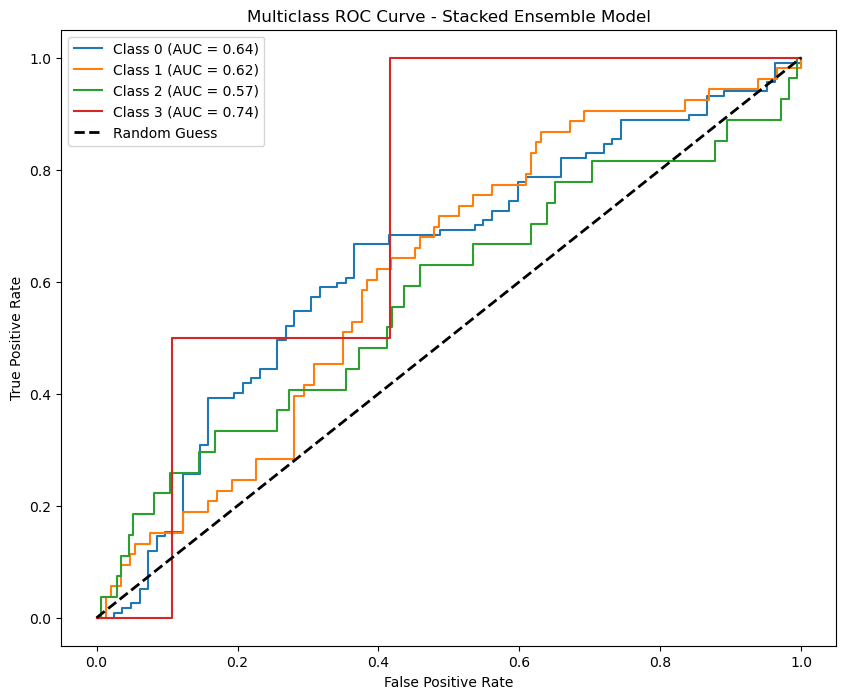

In [1029]:
ensemble_cohen_kappa = cohen_kappa_score(y_meta_val, ensemble_preds)
ensemble_mcc = matthews_corrcoef(y_meta_val, ensemble_preds)

# Binarizing the true and predicted labels for ROC-AUC
n_classes = len(np.unique(y_meta_val))
y_true_binary = label_binarize(y_meta_val, classes=range(n_classes))
ensemble_probs = meta_model.predict_proba(X_meta_val)  # Get probabilities for ROC-AUC calculation

ensemble_roc_auc = roc_auc_score(
    y_true_binary, ensemble_probs, multi_class="ovr", average="weighted"
)

print("Stacked Ensemble Model Performance:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"F1-Score (Weighted): {ensemble_f1:.4f}")
print(f"Precision (Macro): {ensemble_precision:.4f}")
print(f"Recall (Macro): {ensemble_recall:.4f}")
print(f"ROC-AUC (Weighted): {ensemble_roc_auc:.4f}")

# Plotting the ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_binary[:, i], ensemble_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Adding a Random guess line
plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random Guess")
plt.title("Multiclass ROC Curve - Stacked Ensemble Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [1034]:
from joblib import dump, load

# Define the path to save the meta-model
meta_model_path = "/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models/ensemble_meta_model.joblib"

# Save the meta-model
dump(meta_model, meta_model_path)
print(f"Meta-model saved successfully at: {meta_model_path}")

# Reload the saved meta-model
loaded_meta_model = load(meta_model_path)
print("Meta-model loaded successfully!")

# Verifying if the meta-model is fitted by checking its classes_
print("Classes:", loaded_meta_model.classes_)

Meta-model saved successfully at: /Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Models/ensemble_meta_model.joblib
Meta-model loaded successfully!
Classes: [0. 1. 2. 3.]
